# Collisions

In [1]:

import heapq
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
class Visualisations:
    def __init__(self):
        pass
        
    def plot(self, collision_layer):
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
        plt.title("Collision Layer")
        plt.colorbar(label="Collision (1 = Blocked, 0 = Free)")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()

    def plot_path(self, collision_layer_file, path, start, goal):
        collision_layer = np.loadtxt(collision_layer_file)
    
        plt.figure(figsize=(20, 20))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
    
        if path:
            path_y, path_x = zip(*path)
            plt.plot(path_x, path_y, marker="o", color="blue", markersize=5, linestyle="-", label="Path")
    
        plt.scatter(start[1], start[0], color="green", s=100, label="Start")  
        plt.scatter(goal[1], goal[0], color="red", s=100, label="Goal")  
    
        plt.legend()
        plt.title("Pathfinding Visualization")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()


In [3]:
import heapq

import numpy as np
from PIL import Image
# Let op!: current position moet tuple zijn


class AStar:
    def __init__(self):
        pass

    def search_path(self, start, goal, allowed_colors):
        self.get_layer_collision(allowed_colors)
        collisions = np.loadtxt(f"{allowed_colors}.txt", dtype=int)

        open_set = []
        heapq.heappush(open_set, (0, tuple(start)))  # Convert start to tuple
        came_from = {}
        g_score = {tuple(start): 0}  # Convert start to tuple
        f_score = {tuple(start): self.heuristic(start, goal)}

        while open_set:
            _, current = heapq.heappop(open_set)

            if current == tuple(goal):  # Ensure goal comparison matches tuple
                path = []
                while current in came_from:
                    path.append(list(current))  # Convert back to list for consistency
                    current = came_from[current]
                path.append(list(start))  # Convert back to list
                return path[::-1]

            for neighbor in self.get_neighbors(current, collisions):
                neighbor_tuple = tuple(neighbor)  # Convert to tuple for dict key
                tentative_g_score = g_score[current] + 1
                if neighbor_tuple not in g_score or tentative_g_score < g_score[neighbor_tuple]:
                    came_from[neighbor_tuple] = current
                    g_score[neighbor_tuple] = tentative_g_score
                    f_score[neighbor_tuple] = tentative_g_score + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor_tuple], neighbor_tuple))

        print("No path", allowed_colors)
        return [list(start)]

    @staticmethod
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    @staticmethod
    def get_neighbors(node, collisions):
        height, width = collisions.shape
        y, x = node
        neighbors = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dy, dx in directions:
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width and collisions[ny, nx] == 0:
                neighbors.append([ny, nx])  # Keep neighbors as lists
        return neighbors

    @staticmethod
    def get_layer_collision(allowed_colors):
        colors = {
            "blue": (0, 0, 255),
            "black": (0, 0, 0),
            "grey": (128, 128, 128),
            "green": (0, 255, 0),
            "brown": (143, 110, 26),
            "red": (255, 0, 0),
            "red dark": (155, 0, 0)
        }
        allowed_colors_rgb = [colors[color] for color in allowed_colors]
        image = Image.open(
            "/Users/youssefboulfiham/PycharmProjects/pythonProject/Youssef-Nieuwegein/graphics/enviroment_activity.png").convert(
            "RGB")
        width, height = image.size
        pixels = image.load()
        collision_layer = np.zeros((height, width), dtype=int)
        for y in range(height):
            for x in range(width):
                if pixels[x, y] not in allowed_colors_rgb:
                    collision_layer[y, x] = 1  # Block the color
        np.savetxt(f"{allowed_colors}.txt", collision_layer, fmt='%d')


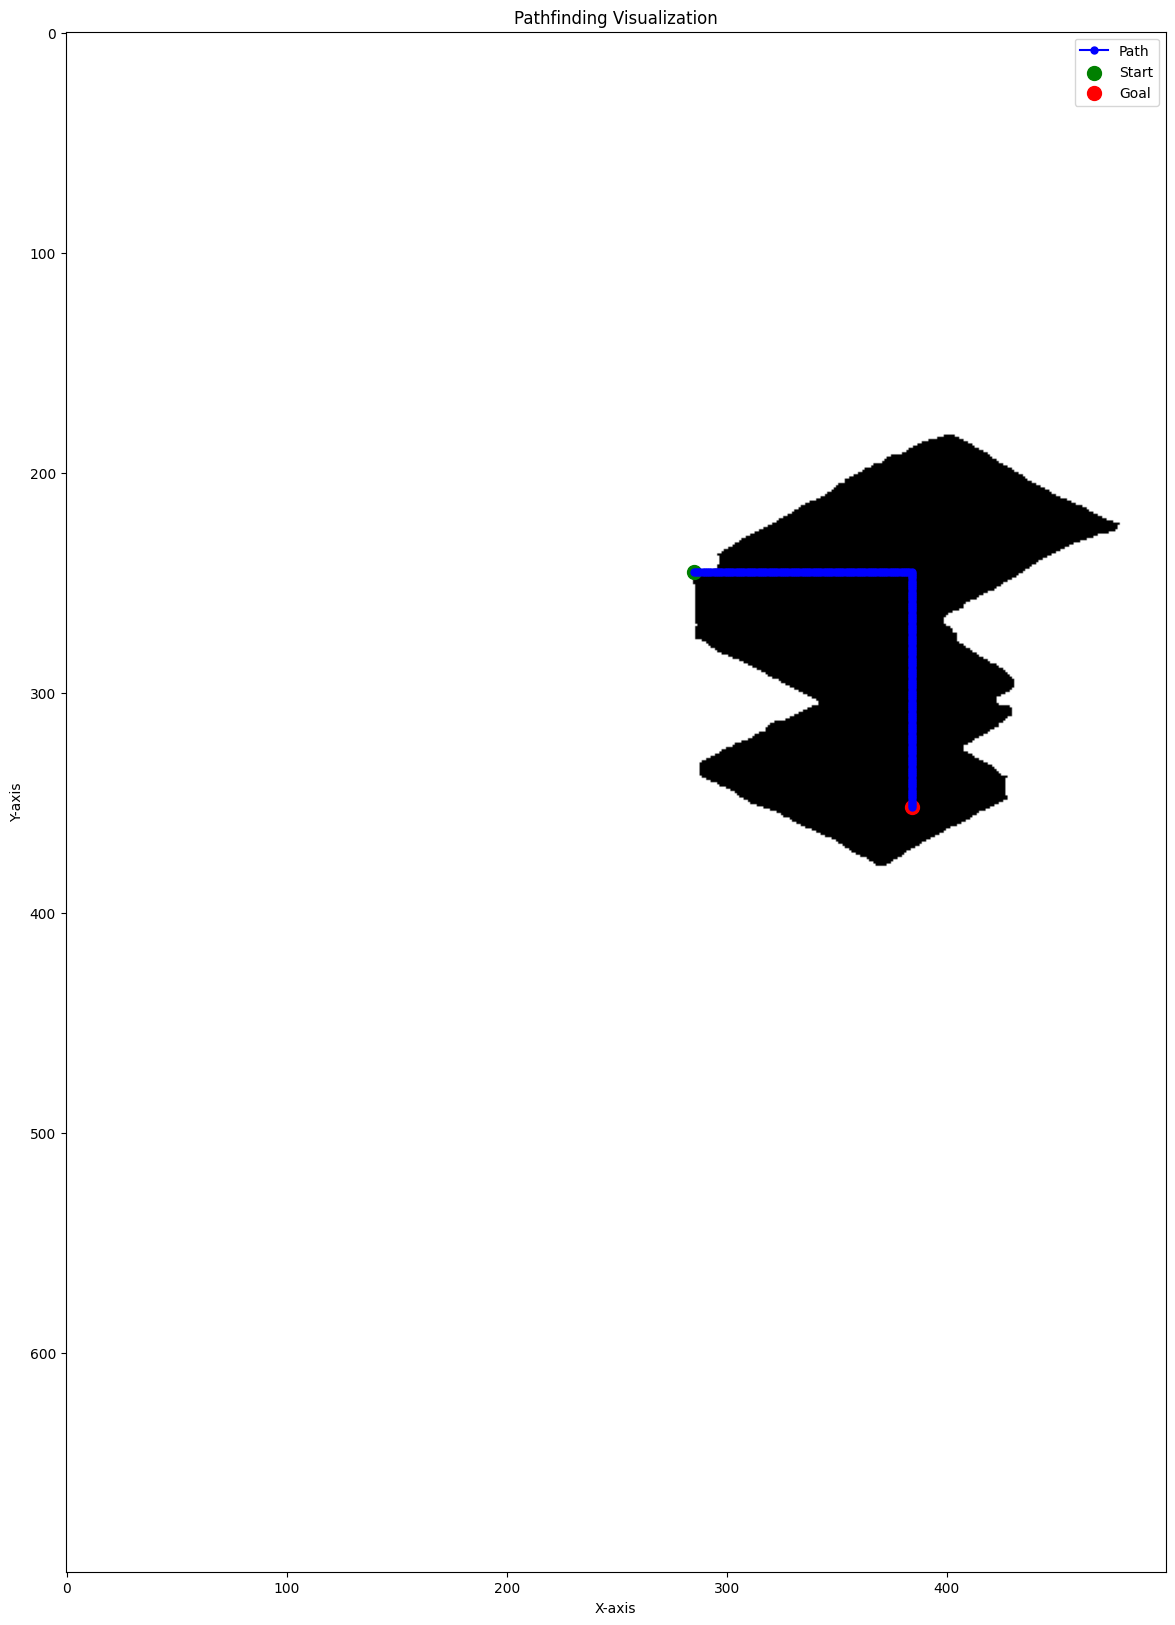

[[245, 285], [245, 286], [245, 287], [245, 288], [245, 289], [245, 290], [245, 291], [245, 292], [245, 293], [245, 294], [245, 295], [245, 296], [245, 297], [245, 298], [245, 299], [245, 300], [245, 301], [245, 302], [245, 303], [245, 304], [245, 305], [245, 306], [245, 307], [245, 308], [245, 309], [245, 310], [245, 311], [245, 312], [245, 313], [245, 314], [245, 315], [245, 316], [245, 317], [245, 318], [245, 319], [245, 320], [245, 321], [245, 322], [245, 323], [245, 324], [245, 325], [245, 326], [245, 327], [245, 328], [245, 329], [245, 330], [245, 331], [245, 332], [245, 333], [245, 334], [245, 335], [245, 336], [245, 337], [245, 338], [245, 339], [245, 340], [245, 341], [245, 342], [245, 343], [245, 344], [245, 345], [245, 346], [245, 347], [245, 348], [245, 349], [245, 350], [245, 351], [245, 352], [245, 353], [245, 354], [245, 355], [245, 356], [245, 357], [245, 358], [245, 359], [245, 360], [245, 361], [245, 362], [245, 363], [245, 364], [245, 365], [245, 366], [245, 367], [24

In [7]:
Pathfinding = AStar()
start, goal = (352, 384), (240, 384)
start, goal = (245, 285), (352, 384)
allowed_colors=["green"]
path = Pathfinding.search_path(start=start,
                               goal=goal,
                               allowed_colors=allowed_colors)
Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, start, goal)
print(path)

In [5]:
stop
Pathfinding = AStar()
school = (600, 400)
allowed_colors = ["black", "blue"]
path = Pathfinding.search_path(start=weg_hart, goal=school, allowed_colors=allowed_colors)
Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, weg_hart, school)

NameError: name 'stop' is not defined

In [ ]:
class Visualisations:
    def __init__(self):
        pass
        
    def plot(self, collision_layer):
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
        plt.title("Collision Layer")
        plt.colorbar(label="Collision (1 = Blocked, 0 = Free)")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()

    def plot_path(self, collision_layer_file, path, start, goal):
        collision_layer = np.loadtxt(collision_layer_file)
    
        plt.figure(figsize=(30, 90))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
    
        if path:
            path_y, path_x = zip(*path)
            plt.plot(path_x, path_y, marker="o", color="blue", markersize=5, linestyle="-", label="Path")
    
        plt.scatter(start[1], start[0], color="green", s=100, label="Start")  
        plt.scatter(goal[1], goal[0], color="red", s=100, label="Goal")  
    
        plt.legend()
        plt.title("Pathfinding Visualization")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()


In [ ]:
Visualizer = Visualisations()
path = "['red'].txt"
# path = "['black', 'blue'].txt"
load = np.loadtxt(path, dtype=int)
Visualizer.plot(load)
load.shape


In [ ]:
Pathfinding = AStar()
Pathfinding.get_collision_layer(["red"])
Visualizer = Visualisations()
path = "['red'].txt"
# path = "['black', 'blue'].txt"
load = np.loadtxt(path, dtype=int)
Visualizer.plot(load)
load.shape

In [ ]:
Pathfinding = AStar()
school = (600, 400)
thuis = (250, 100)
back_alley = (190, 220)
thuis_vriend = (380, 250)
allowed_colors = ["black", "red"]
path = Pathfinding.search_path(start=thuis, goal=back_alley, allowed_colors=allowed_colors)

Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, thuis, back_alley)

allowed_colors = ["black", "red dark"]
path = Pathfinding.search_path(start=back_alley, goal=thuis_vriend, allowed_colors=allowed_colors)
Visualizer.plot_path(f"{allowed_colors}.txt", path, back_alley, thuis_vriend)


In [ ]:
Pathfinding = AStar()
school = (260, 330)
thuis = (250, 100)
back_alley = (190, 220)
thuis_vriend = (380, 250)
vrije_tijd = (600, 400)
allowed_colors = ["red", "black", "green"]
path = Pathfinding.search_path(start=thuis, goal=vrije_tijd, allowed_colors=allowed_colors)

Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, thuis, vrije_tijd)